# 📊 Interactive Sales Dashboard using Matplotlib & Gradio

👨‍💼 **Created by:** Pooja sharma 
🎯 **Objective:**  
This project demonstrates how small business owners can visualize and interpret their monthly **sales and profit trends** using Python’s Matplotlib and Gradio.

With just a few lines of code, we convert raw data into interactive visualizations without the need for Excel or BI tools like Power BI.


## 📁 1. Sample Business Data Creation
We create a small DataFrame to simulate 6 months of sales and profit data.

In [1]:
import pandas as pd

data ={
    "Months": ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    "Sales"  : [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit" : [2000, 3000, 4000, 2500, 3500, 3000]
}

df = pd.DataFrame(data)

print(df)

  Months  Sales  Profit
0    Jan  10000    2000
1    Feb  12000    3000
2    Mar  15000    4000
3    Apr  13000    2500
4    May  17000    3500
5    Jun  16000    3000


In [2]:
df['Months']

0    Jan
1    Feb
2    Mar
3    Apr
4    May
5    Jun
Name: Months, dtype: object

In [3]:
df['Sales']

0    10000
1    12000
2    15000
3    13000
4    17000
5    16000
Name: Sales, dtype: int64

## 📈 2. Core Visualizations with Matplotlib
We define functions to plot various chart types based on user input.

## 1- LINE PLOT MONTHLY SALES


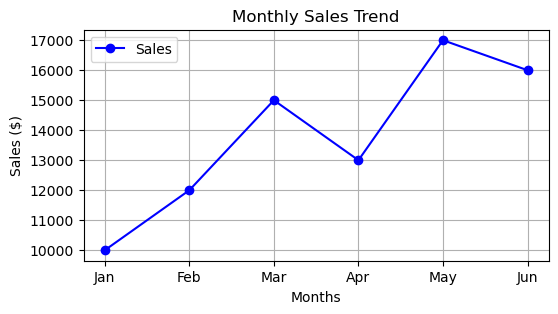

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(df['Months'], df['Sales'], color='blue', marker='o', linestyle='-', label='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.show()

# 2- BAR PLOT SALES AND PROFIT TREND


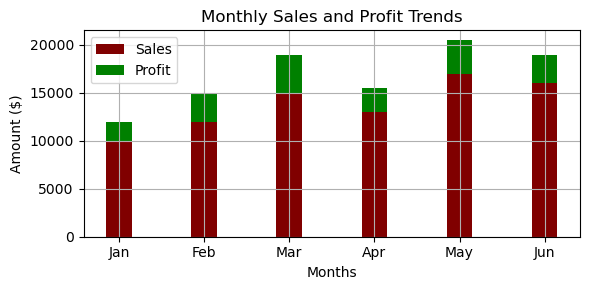

In [5]:
plt.figure(figsize=(6, 3))
width = 0.3
plt.bar(df['Months'], df['Sales'], width=width, color='maroon', label='Sales')
plt.bar(df['Months'], df['Profit'], width=width, color='green', label='Profit', bottom=df['Sales'])
plt.title('Monthly Sales and Profit Trends')
plt.xlabel('Months')
plt.ylabel('Amount ($)')
plt.grid(True)
plt.legend()  
plt.tight_layout()  
plt.show()

# 3- Pie Chart: Profit Distribution by Month


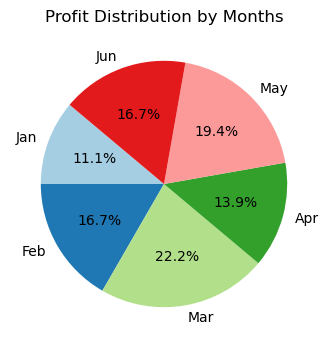

In [6]:
plt.figure(figsize=(8, 4))
plt.pie(df['Profit'], labels=df['Months'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Profit Distribution by Months')
plt.show()

# 4- Scatter Plot: Sales vs Profit (Correlation)


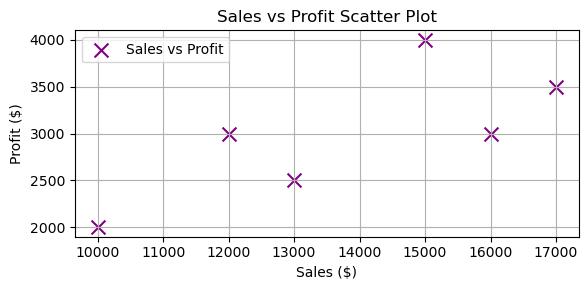

In [7]:
plt.figure(figsize=(6, 3))
plt.scatter(df['Sales'], df['Profit'], color='purple', marker='x', label='Sales vs Profit', s=100, )
plt.title('Sales vs Profit Scatter Plot')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()


# 5- Histogram: Distribution of Sales


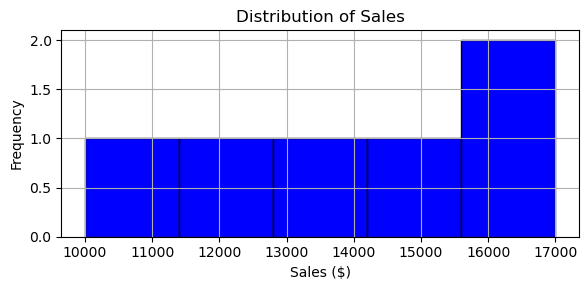

In [8]:
plt.figure(figsize=(6, 3))
plt.hist(df['Sales'], bins=5, color='blue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6- Box Plot: Profit Distribution


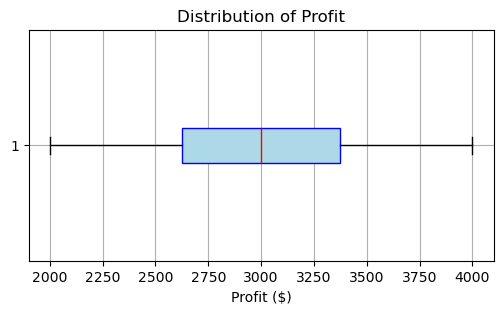

In [9]:
plt.figure(figsize=(6, 3))
plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))
plt.title('Distribution of Profit')
plt.xlabel('Profit ($)')
plt.grid(True)
plt.show()


# !pip install gradio


## ⚙️ 3. Interactive Dashboard using Gradio
Let’s now make the visualizations interactive using Gradio dropdown.

In [10]:
import gradio as gr
import matplotlib.pyplot as plt
import pandas as pd

data ={
    "Months": ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    "Sales"  : [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit" : [2000, 3000, 4000, 2500, 3500, 3000]
}

df = pd.DataFrame(data)

def generate_plot(plot_type):
    # Create a figure with a specified size
    plt.figure(figsize=(6, 3))
    
    # Check the type of plot to be generated
    if plot_type == 'Line Plot':
        # Generate a line plot with sales data
        plt.plot(df['Months'], df['Sales'], color='blue', marker='o', linestyle='-', label='Sales')
        plt.title('Monthly Sales Trend')
        plt.xlabel('Months')
        plt.ylabel('Sales ($)')
    
    elif plot_type == 'Bar Chart':
        # Generate a bar chart with sales and profit data
        width = 0.3
        plt.bar(df['Months'], df['Sales'], width=width, color='maroon', label='Sales')
        plt.bar(df['Months'], df['Profit'], width=width, color='green', label='Profit', bottom=df['Sales'])
        plt.title('Monthly Sales and Profit Trends')
        plt.xlabel('Months')
        plt.ylabel('Amount ($)')
    
    elif plot_type == 'Pie Chart':
        # Generate a pie chart with profit data
        plt.pie(df['Profit'], labels=df['Months'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('Profit Distribution by Months')
    
    elif plot_type == 'Scatter Plot':
        # Generate a scatter plot with sales and profit data
        plt.scatter(df['Sales'], df['Profit'], color='purple', marker='x', label='Sales vs Profit', s=100)
        plt.title('Sales vs Profit Scatter Plot')
        plt.xlabel('Sales ($)')
        plt.ylabel('Profit ($)')
    
    elif plot_type == 'Histogram':
        # Generate a histogram with sales data
        plt.hist(df['Sales'], bins=5, color='blue', edgecolor='black')
        plt.title('Distribution of Sales')
        plt.xlabel('Sales ($)')
        plt.ylabel('Frequency')
    
    elif plot_type == 'Box Plot':
        # Generate a box plot with profit data
        plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))
        plt.title('Distribution of Profit')
        plt.xlabel('Profit ($)')
    
    plt.tight_layout()    
    # Add a grid to the plot
    plt.grid(True)
    # Add a legend to the plot
    plt.legend()
    return plt.gcf()



# Create a Gradio interface with a dropdown for plot selection
demo = gr.Interface(
    fn=generate_plot,
    inputs=gr.Dropdown(
        choices=[
            'Line Plot',
            'Bar Chart',
            'Pie Chart',
            'Scatter Plot',
            'Histogram',
            'Box Plot'
        ],
        label='Select Plot Type'
    ),
    outputs=gr.Plot(label='Generated Plot'),
    title="Sales & Profit Visual Explorer",
    description='Select a plot type to visualize the sales and profit data.'
)

# Launch the Gradio interface
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


## ✅ 4. Final Thoughts + Extensions

This interactive dashboard helps stakeholders:
- 🧭 Understand monthly performance visually
- 🔍 Detect outliers, trends, and correlations
- ⚡ Gain insights quickly without Excel or BI tools

**Possible Extensions:**
- Upload custom CSV using Gradio’s `File` input
- Add monthly year-over-year comparison
- Include KPIs or summary metrics

---

📌 *Guided by: @K.Praskah senapati sir*
